In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

C:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\ml\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [2]:
data = np.loadtxt('pima-indians-diabetes.data.txt', delimiter=',')
data[0,:8]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

#### Parameters

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)

### Splitting data into *'train'* and *'test'* dataset

In [3]:
train_data = data[:int(0.9*data.shape[0]),:8]
train_labels = data[:int(0.9*data.shape[0]),8]

test_data = data[train_data.shape[0]:,:8]
test_labels = data[train_labels.shape[0]:,8]

assert(train_data.shape[0]+test_data.shape[0] == data.shape[0])

In [4]:
data.shape

(768, 9)

In [5]:
'''
for i in range(train_data.shape[1]):
    train_data[:,i] = (train_data[:,i] + np.mean(train_data[:,i])) / np.std(train_data[:,i])

for i in range(test_data.shape[1]):
    test_data[:,i] = (test_data[:,i] + np.mean(test_data[:,i])) / np.std(test_data[:,i])
'''

'\nfor i in range(train_data.shape[1]):\n    train_data[:,i] = (train_data[:,i] + np.mean(train_data[:,i])) / np.std(train_data[:,i])\n\nfor i in range(test_data.shape[1]):\n    test_data[:,i] = (test_data[:,i] + np.mean(test_data[:,i])) / np.std(test_data[:,i])\n'

### Building the Sequential model

In [6]:
model = Sequential([
    Dense(12, input_dim = 8, activation='relu'),
    #Dropout(0.2),
    #Dense(12, activation='relu'),
   # Dense(8, activation='relu'),
    #Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
history = model.fit(train_data, train_labels, validation_data = (test_data, test_labels),epochs = 200, verbose=0)
print('Train acc.:{}, Test acc.:{}'.format(history.history['acc'][-1], history.history['val_acc'][-1]))

Train acc.:0.7424023151397705, Test acc.:0.7402597665786743


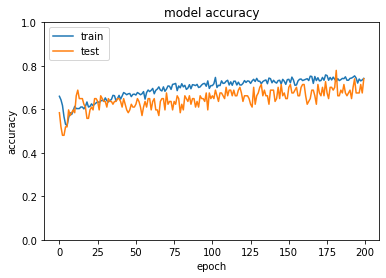

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()